In [87]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [88]:
file = "img/bitmap.pbm"
img = cv.imread(file,0)
img = img/255
img = 1-img
print(np.max(img))

1.0


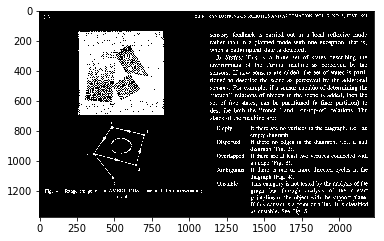

In [89]:
fig = plt.figure()
plt.imshow(img,cmap="gray")
plt.show()

In [90]:
kernel1 = np.ones((100,1),np.uint8)


kernel2 = np.ones((1,200),np.uint8)

print(kernel1.shape)
print(kernel2.shape)

(100, 1)
(1, 200)


In [91]:
dilate = cv.dilate(img,kernel1)
erode = cv.erode(dilate,kernel1)

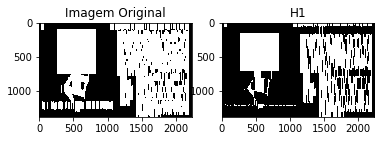

In [92]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(dilate,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(erode,cmap="gray")
a.set_title('H1')

plt.show()

In [93]:
dilate2 = cv.dilate(img,kernel2)
erode2 = cv.dilate(dilate2,kernel2)

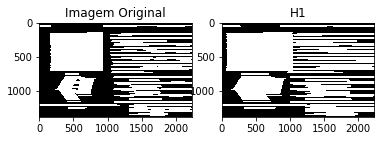

In [94]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(dilate2,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(erode2,cmap="gray")
a.set_title('H1')

plt.show()

In [100]:
img5 = cv.bitwise_and(erode,erode2)

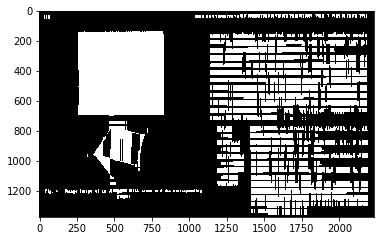

In [103]:
fig = plt.figure()
plt.imshow(img5,cmap="gray")
plt.show()

In [107]:
kernel3 = np.ones((30,1),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel3)

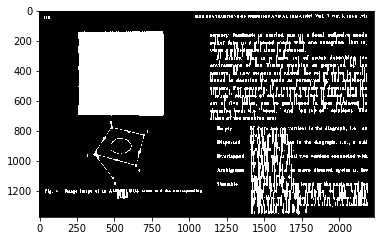

In [108]:
fig = plt.figure()
plt.imshow(closing,cmap="gray")
plt.show()

In [111]:
cv.imwrite("dilate.pbm",1-dilate)
cv.imwrite("erode.pbm",1-erode)
cv.imwrite("dilate2.pbm",1-dilate2)
cv.imwrite("erode2.pbm",1-erode2)
cv.imwrite("img5.pbm",1-img5)
cv.imwrite("closing.pbm",1-closing)

True